## UK housing price vs earning analysis

###  Sources:
Office for National Statistics, Land Registry, Office for National Statistics - Annual Survey of Hours and Earnings

Affordability ratios calculated by dividing house prices for existing dwellings, by gross annual workplace-based earnings. Based on the median and lower quartiles of both house prices and earnings in England and Wales.

### 0. Import Data

In [1]:
# 0. Imports
import numpy as np ## Linear algebra
import pandas as pd ## Dataframe processing
import matplotlib.pyplot as plt ## Data Visualisation
from sklearn.linear_model import LinearRegression

### 1. Read Data

In [2]:
# 1. Read data from housing.data
# get the names from name.data
UK_dataset = pd.read_csv("housing.data", header=None, delimiter=r"\s+",names=column_names)

### 2. Examing the data

In [3]:
UK_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
np.shape(UK_dataset)

(506, 14)

In [5]:
print(UK_dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### 3. Data Pre-processing(&Cleansing)

In [6]:
## Training-set(including target) assignment
X = UK_dataset.RM
Y = UK_dataset.MEDV

#### Same as above, here RM stands for average number of rooms per dwelling whereas MEDV stands for Medium Value(Housing Price)

In [7]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [9]:
# diabetes_X = diabetes_X[:, np.newaxis, 2]
X = X[:,np.newaxis]

C:\Users\yanli\AppData\Local\Temp/ipykernel_35448/1799810436.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [10]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

### 4. Fitting a Linear Model (using Keras)

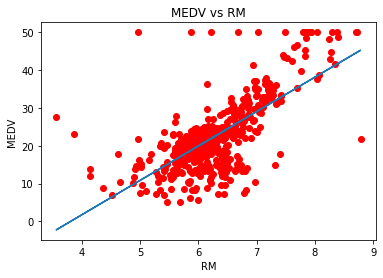

In [11]:
# 3. Fit Linear Model

model = LinearRegression()
model.fit(X,Y)

Y_predict = model.predict(X)

plt.plot(X,Y_predict)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("MEDV vs RM")

plt.scatter(X,Y,color='red')

### 5. Fitting a polynomial(2nd, 3rd,4th and 5th Degree) 

In [19]:
# 4. Fit Polynomial
## 2nd degree
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)

X_poly2 = poly2.fit_transform(X.reshape(-1,1))

model2 = LinearRegression()
model2.fit(X_poly2,Y)

Y_predicted = model2.predict(X_poly2)

In [13]:
X_poly2

array([[ 1.      ,  6.575   , 43.230625],
       [ 1.      ,  6.421   , 41.229241],
       [ 1.      ,  7.185   , 51.624225],
       ...,
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  6.794   , 46.158436],
       [ 1.      ,  6.03    , 36.3609  ]])

In [14]:
Y_predicted.size

506

In [15]:
X.size

506

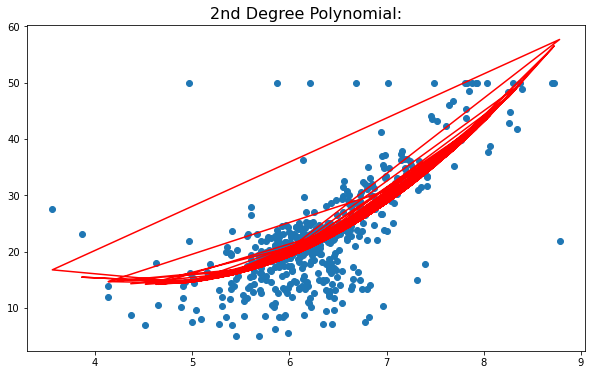

In [20]:
plt.figure(figsize=(10,6))
plt.title("2nd Degree Polynomial:", size=16)
plt.scatter(X,Y)
plt.plot(X,Y_predicted,c="red")# use scatter instead
plt.show()

In [17]:
## 3rd Degree
poly3 = PolynomialFeatures(degree=3)

poly_features = poly3.fit_transform(X.reshape(-1,1))

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,Y)
Y_predicted = poly_reg_model.predict(poly_features)

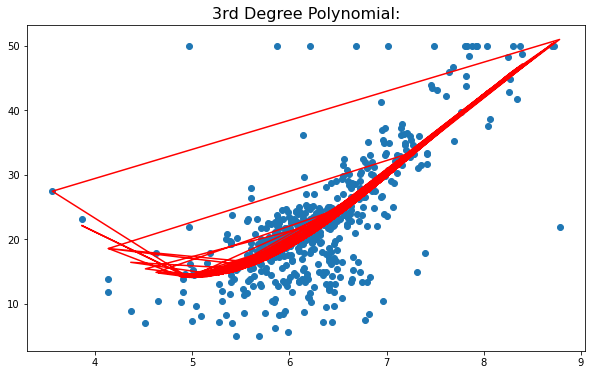

In [18]:
plt.figure(figsize=(10,6))
plt.title("3rd Degree Polynomial:", size=16)
plt.scatter(X,Y)
plt.plot(X,Y_predicted,c="red")
plt.show()

In [19]:
## 4th Degree
poly4 = PolynomialFeatures(degree=4)

poly_features = poly4.fit_transform(X.reshape(-1,1))

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,Y)
Y_predicted = poly_reg_model.predict(poly_features)

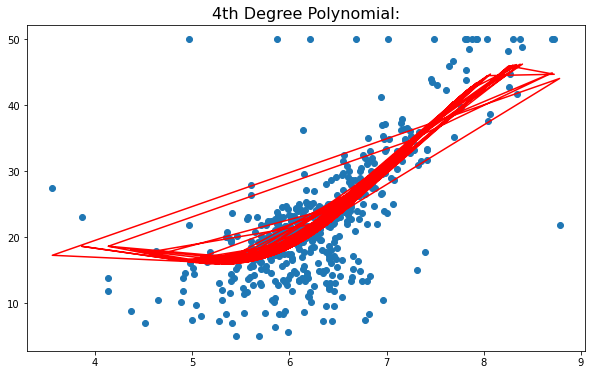

In [20]:
plt.figure(figsize=(10,6))
plt.title("4th Degree Polynomial:", size=16)
plt.scatter(X,Y)
plt.plot(X,Y_predicted,c="red")
plt.show()

In [21]:
## 5th Degree
poly5 = PolynomialFeatures(degree=5)

poly_features = poly5.fit_transform(X.reshape(-1,1))

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features,Y)
Y_predicted = poly_reg_model.predict(poly_features)

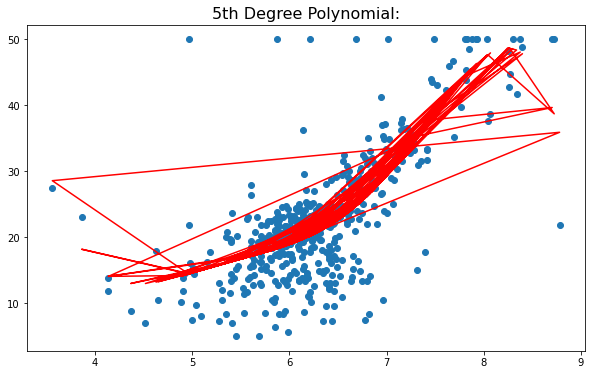

In [22]:
plt.figure(figsize=(10,6))
plt.title("5th Degree Polynomial:", size=16)
plt.scatter(X,Y)
plt.plot(X,Y_predicted,c="red")
plt.show()

### 6. Observation

#### As shown above, linear regression(1st degreee) already provides a pretty good fit for both datasets

#### Furthermore, we split the dataset into two: training set and testing set, and try to fit the curve again to see whether our result is generalized and prone to overfitting.

In [24]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [26]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
# print the data
x_train

array([[6.849],
       [6.31 ],
       [6.266],
       [6.43 ],
       [7.333],
       [5.987],
       [7.929],
       [6.345],
       [5.88 ],
       [6.03 ],
       [6.023],
       [6.715],
       [5.895],
       [6.487],
       [5.036],
       [6.812],
       [5.981],
       [6.208],
       [6.312],
       [6.153],
       [5.972],
       [7.802],
       [6.976],
       [5.783],
       [6.727],
       [5.593],
       [6.438],
       [6.54 ],
       [3.561],
       [5.759],
       [6.185],
       [7.206],
       [5.851],
       [6.142],
       [5.998],
       [6.481],
       [6.794],
       [6.004],
       [6.683],
       [7.185],
       [6.164],
       [6.108],
       [6.02 ],
       [6.113],
       [7.241],
       [6.957],
       [7.52 ],
       [6.8  ],
       [6.167],
       [6.833],
       [5.412],
       [6.425],
       [6.14 ],
       [5.803],
       [5.572],
       [6.484],
       [6.674],
       [4.628],
       [7.274],
       [5.362],
       [6.167],
       [5.875],
       [

In [35]:
from sklearn.linear_model import LinearRegression
model_split = LinearRegression()
model_split.fit(x_train,y_train)
model_split.score(x_test,y_test)
Y_predict = model_split.predict(x_test)

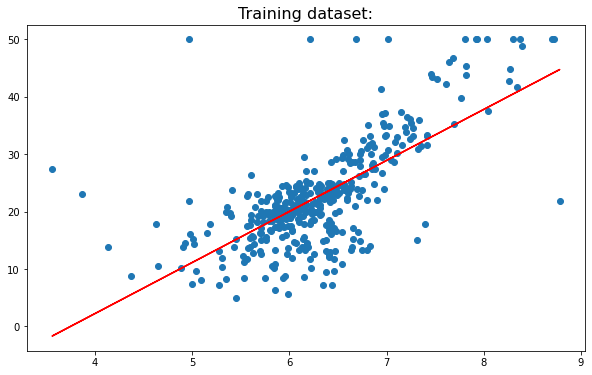

In [40]:
plt.figure(figsize=(10,6))
plt.title("Training dataset:", size=16)
plt.scatter(x_train,y_train)

Y_predicted = model_split.predict(x_train)
plt.plot(x_train,Y_predicted,c="red")
plt.show()

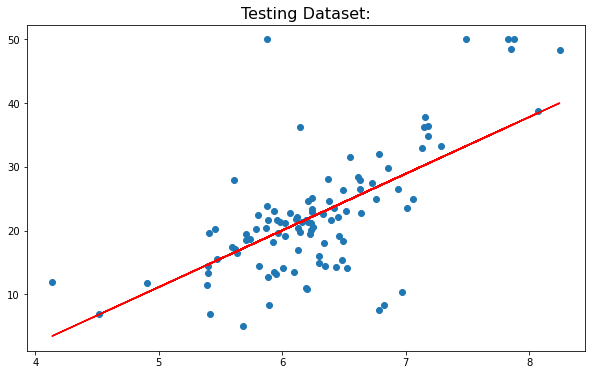

In [41]:
plt.figure(figsize=(10,6))
plt.title("Testing Dataset:", size=16)
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_predict,c="red")
plt.show()

### 7. Conclusion

# As shown above, the 1st degree linear regression here provides a pretty good fit for both datasets.
## Thus, we conclude that: there exists a linear relationship between Housing Prices and Average number of Rooms per dwelling